In [ ]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:
# 🔹 Charger le dataset (Remplace 'ton_fichier.csv' par le bon chemin)
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# 🔹 Supprimer les valeurs manquantes
df.dropna(inplace=True)

# 🔹 Normaliser les données (Standardisation)
scaler = StandardScaler()
X = scaler.fit_transform(df.select_dtypes(include=[np.number]))  # Prendre uniquement les colonnes numériques

# 🔹 Afficher les premières lignes du dataset transformé
print("Aperçu des données après prétraitement :")
print(pd.DataFrame(X, columns=df.select_dtypes(include=[np.number]).columns).head())


Aperçu des données après prétraitement :
        Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0 -0.522124 -0.875589 -0.862558 -0.785019  0.404153 -0.013073 -1.188039   
1 -0.522124 -1.947599 -1.168077  1.088342  0.404153  1.618759  2.339750   
2 -0.206889  1.054029 -0.366090 -0.785019  0.404153 -0.013073  1.163820   
3  0.423582  1.054029  0.015808  1.088342  0.404153 -0.013073  1.163820   
4 -0.364507  0.839627  0.122740 -0.785019 -2.167023 -0.013073 -1.188039   

        TUE  
0  0.561997  
1 -1.080625  
2  0.561997  
3 -1.080625  
4 -1.080625  


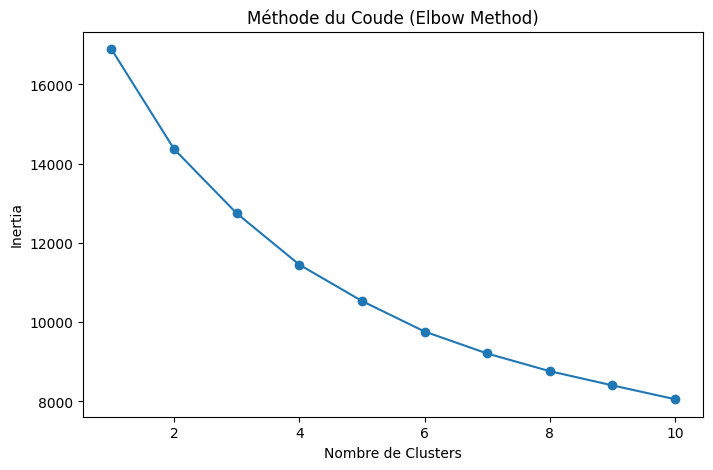

In [ ]:
# 🔹 Déterminer le nombre optimal de clusters avec la Méthode du Coude
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# 🔹 Afficher le graphique Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inertia')
plt.title('Méthode du Coude (Elbow Method)')
plt.show()


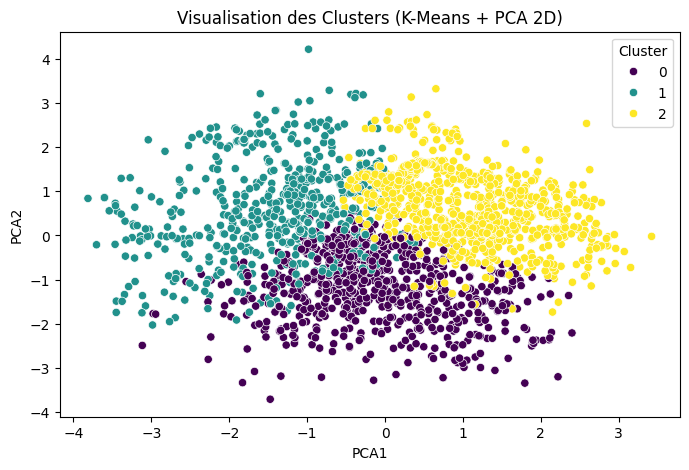

In [ ]:
# 🔹 Choisir un nombre de clusters optimal (par exemple 3)
k = 3  # Modifier ce nombre selon le coude observé
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

# 🔹 Réduction de dimension avec PCA pour visualisation en 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df['PCA1'], df['PCA2'] = X_pca[:, 0], X_pca[:, 1]

# 🔹 Visualisation des clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='viridis')
plt.title('Visualisation des Clusters (K-Means + PCA 2D)')
plt.show()


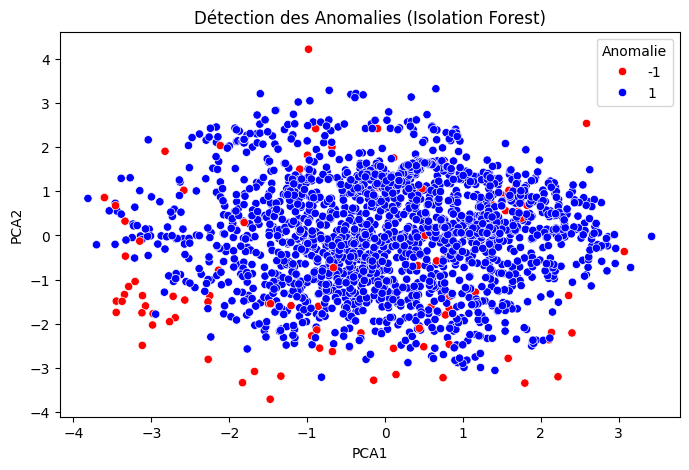

Nombre total d'anomalies détectées : 106


In [ ]:
# 🔹 Détection des anomalies avec Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomalie'] = iso_forest.fit_predict(X)

# 🔹 Visualisation des anomalies (points rouges = anomalies détectées)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Anomalie'], palette={1: 'blue', -1: 'red'})
plt.title('Détection des Anomalies (Isolation Forest)')
plt.show()

# 🔹 Affichage du nombre total d'anomalies
print("Nombre total d'anomalies détectées :", (df['Anomalie'] == -1).sum())


In [ ]:
# 🔹 Affichage des 5 premières lignes du dataset final
print("\nAperçu du dataset après clustering et détection d'anomalies :")
print(df.head())



Aperçu du dataset après clustering et détection d'anomalies :
   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  ...  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no  ...   no  0.0  1.0          no   
1  3.0  Sometimes   yes  ...  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no  ...   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no  ...   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no  ...   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad Cluster      PCA1      PCA2  \
0  Public_Transportation        Normal_Wei

In [ ]:
n_dims = X.shape
n_dims

(200, 2)

1

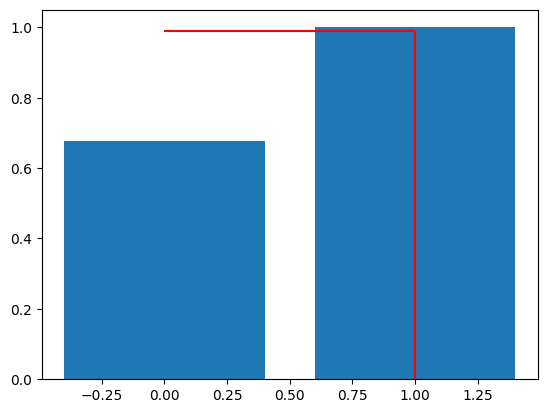

In [ ]:
n_dims = X.shape[1]
model = PCA(n_components=n_dims)
X_compress = model.fit_transform(X)
variances = model.explained_variance_ratio_
plt.bar(range(n_dims), np.cumsum(variances))

meilleur_dims = np.argmax(np.cumsum(variances) >= 0.99)



plt.hlines(0.99, 0, meilleur_dims, colors='r')
plt.vlines(meilleur_dims, 0, 0.99, colors='r')
n_dims
np.argmax(np.cumsum(variances)>=0.99)

Variables catégoriques: Index([], dtype='object')


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931,0.048394,0.205725,...,0.003652,0.020286,-0.554448,-0.063064,-0.160927,0.110675,0.250082,-0.054835,-0.056291,0.168847
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912,0.618466,0.247684,...,0.028996,-0.010471,-0.089684,0.036951,-0.106700,-0.037693,0.304150,-0.064443,-0.059212,0.008857
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561,0.161668,0.496820,...,-0.021745,-0.037300,0.059332,-0.100805,-0.370099,0.107174,0.443793,0.558662,-0.187748,-0.068593
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135,-0.274505,0.040372,...,-0.029843,-0.007512,0.057966,0.013991,-0.062828,-0.194922,-0.021042,0.463421,-0.115437,-0.118467
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326,0.067600,0.071370,...,0.023312,0.003875,-0.056849,0.006502,0.027052,-0.145691,0.030653,0.172090,-0.093069,-0.097527
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965,0.107930,0.147437,...,0.026139,-0.000946,0.037504,0.008307,-0.102168,0.075940,-0.086071,0.139303,0.033025,0.011150
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562,0.189607,-0.056673,...,0.067129,-0.016351,-0.048751,0.108927,0.110591,-0.012367,-0.018291,-0.172988,0.021820,-0.024508
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000,0.017269,0.022943,...,-0.021725,-0.067402,0.143597,0.073404,0.011789,0.013847,-0.094833,-0.037240,-0.029415,0.025833
Gender_Male,0.048394,0.618466,0.161668,-0.274505,0.067600,0.107930,0.189607,0.017269,1.000000,0.102512,...,0.057001,0.045203,-0.160184,0.039317,0.002213,0.044334,0.394418,-0.428249,-0.004726,0.110873
family_history_with_overweight_yes,0.205725,0.247684,0.496820,0.040372,0.071370,0.147437,-0.056673,0.022943,0.102512,1.000000,...,-0.015435,-0.051011,-0.058927,-0.067076,-0.285109,0.187851,0.187576,0.201104,-0.100173,0.124331


<Axes: >

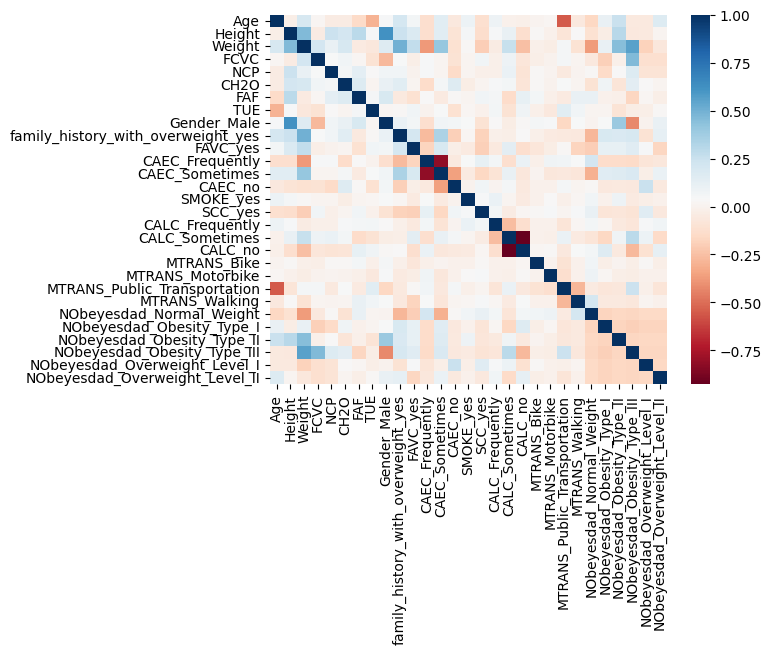

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
# Vérifier les variables catégoriques
categorical_features = df.select_dtypes(include=['object']).columns
print("Variables catégoriques:", categorical_features)

# Encodage des variables catégoriques
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)



# Calculate correlation matrix on the encoded DataFrame
corr_encoded = df.corr()

# Display the correlation matrix
display(corr_encoded)

# Plot the correlation heatmap
sns.heatmap(corr_encoded, xticklabels=corr_encoded.columns,
            yticklabels=corr_encoded.columns, cmap='RdBu')